#### -*- coding: utf-8 -*-
#### @Author: NUDT.Lizh
#### @Date:   2022-10-30 19:53:28
#### @Email:  lizihao19@nudt.edu.cn
#### @Last Modified by:   NUDT.Lizh
#### @Last Modified time: 2022-11-01 10:34:14

### 一、阈值化

阈值化的目的通常是为了分割出目标区域和背景区域。因为对于一个目标来讲，在边缘的灰度变化通常最大，这个时候可以通过阈值来进行分割

#### 简单阈值化

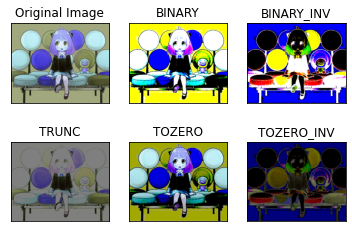

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("Ania.jpg")
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

参数说明：

binary:二值化，小于阈值的设为0，大于的设为255

binary_inv：小于阈值设为255，大于设为0

trunc:大于阈值设为255，小于不变

tozero:大于不变，小于设0

tozero_inv:大于设0，小于则不变

#### （二）自适应阈值化

显然，一张图片的不同区域光照条件肯定不同，因此如果我们用一个阈值对整个图片进行处理，产生的效果不会好。这个时候，对每个像素，针对周围的像素来进行处理，能够起到很好的效果

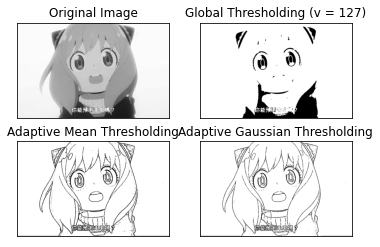

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("Ania.png",0)
img = cv2.medianBlur(img,5) 
#plt.imshow(img)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

对于adaptiveThreshold函数来讲，有两个参数需要讲。一个是加权方式，mean使用的是周围的像素平均权重，而guass是根据像素距离中心像素的距离来递减，离得越远影响越小。

第二个参数是blocksize,指的是邻域范围。

#### OTSU二值化

Otsu方法是这么考虑的，将图像分为目标和背景两个部分，因此两个方面的灰度直方图一定不一样，这样可以找到最佳的全局阈值，使得背景和目标的方差最大，便是最佳分割

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread("Ania.jpg",0) #灰度图
_,img1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
_,img2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,2)
cv2.imshow("origin",img)
cv2.imshow("img",img2)
cv2.imshow("2",th2)
cv2.waitKey(0)

-1

### 二、图像平滑

在对图像进行滤波操作时，低通滤波能够帮助去噪，模糊图像；高通滤波能够发现边缘特征

二维卷积操作

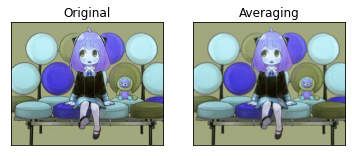

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("Ania.jpg")
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(img,3,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

模糊处理

均值滤波

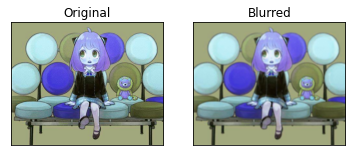

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("Ania.jpg")
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

高斯滤波

高斯滤波的原理是根据像素离中心的距离来定义权重的。具体定义方法为：
$$
G_i = \alpha*e^{-(i-(ksize-1)/2)^2/(2\sigma)^2}
$$
且满足
$$
\Sigma_iG_i = 1
$$
上式中$\sigma$为高斯分布的标准差，但如果小于0，则定义为$\sigma = 0.3*((ksize-1)*0.5-1)+0.8$

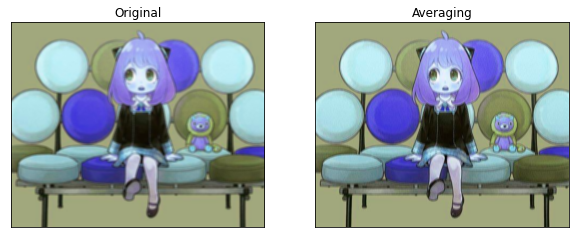

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("Ania.jpg")
kernel = cv2.getGaussianKernel(5,100)
dst = cv2.filter2D(img,3,kernel)
blur = cv2.GaussianBlur(img,(5,5),100)
plt.figure(figsize=[10,10])
plt.subplot(121),plt.imshow(blur),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

中值滤波

双边滤波

综合考虑空间信息和色彩信息，即在计算周围像素点的权重时，会综合考虑像素的距离和颜色差别，即空间信息和色彩信息。距离越远，权重越小，颜色差越大，权重越小。这样就保护了边缘信息。

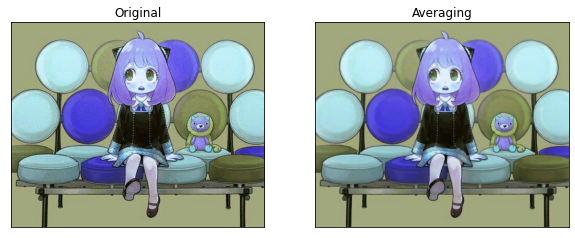

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("Ania.jpg")
blur = cv2.bilateralFilter(img,5,95,95)
plt.figure(figsize=[10,10])
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()